In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("Bengaluru_House_Data.csv")

In [2]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
data.shape

(13320, 9)

In [6]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
data.drop('society', axis=1, inplace=True)

In [8]:
data.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [9]:
# location is having only one null value we must drop it.

# it will drop only from location feature.


data.dropna(subset=['location'],inplace = True)

# we will also drop null values form bath and balcony as it is not that larger number
data.dropna(subset = ['size','bath','balcony'],inplace = True)

In [10]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), object(5)
memory usage: 893.7+ KB


In [12]:
#look at the  value counts of each category.

for col in data.columns:
    print(data[col].value_counts())
    print("#"*30)
    

Super built-up  Area    8481
Built-up  Area          2310
Plot  Area              1837
Carpet  Area              82
Name: area_type, dtype: int64
##############################
Ready To Move    10077
18-Dec             291
18-May             282
18-Apr             261
18-Aug             200
                 ...  
16-Nov               1
14-Jul               1
15-Dec               1
16-Jan               1
20-Feb               1
Name: availability, Length: 78, dtype: int64
##############################
Whitefield                            514
Sarjapur  Road                        372
Electronic City                       300
Kanakpura Road                        261
Thanisandra                           231
                                     ... 
Kirloskar layout, Basaveshwarnagar      1
Maruthi nagar kogilu                    1
2nd phase jp nagar, jp nagar            1
Lakshmipura Vidyaanyapura               1
Viswajit Layout                         1
Name: location, Length: 1265, dt

In [13]:
data.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [14]:
#now we dont have any null values in out data.
#But we do have some object datatypes that we need to convert to integer or float.

# print(data['total_sqft'].head(60))
# print("\n\nTail starts from here\n")
# print(data['total_sqft'].tail(60))

print(data['total_sqft'].tolist())


#we can see it contains data of type int,float,and range(eg. 100-200)
# we need to change it into one.

['1056', '2600', '1440', '1521', '1200', '1170', '1310', '1800', '2785', '1000', '1100', '2250', '1175', '1180', '1540', '2770', '1100', '600', '1755', '2800', '1767', '510', '1250', '660', '1610', '1151', '1025', '2100 - 2850', '1075', '1760', '1693', '700', '1070', '1724', '1290', '1143', '1254', '600', '660', '1330.74', '970', '1459', '800', '869', '1270', '1670', '2010', '1185', '1600', '1200', '1500', '1407', '840', '4395', '845', '5700', '1160', '3000', '1100', '1140', '1220', '1350', '1005', '500', '1358', '1569', '1240', '2089', '1206', '1150', '2511', '460', '4400', '1660', '1326', '1325', '1499', '3000', '1665', '708', '1060', '710', '1000', '1000', '1450', '1200', '1296', '1540', '2894', '1330', '1200', '1200', '2502', '650', '2400', '1007', '1200', '966', '1630', '1640', '782', '1260', '1800', '1413', '1116', '1530', '3700', '2497', '1540', '1436', '1100', '276', '1427', '2061', '3067 - 8156', '2650', '1282', '1050', '1600', '945', '1500', '950', '1870', '1600', '880', '120

In [15]:
#converting total_sqft data into float

total_sqft_in_int = []
for str_val in data['total_sqft']:
  try: # if value in string is float or int.
    total_sqft_in_int.append(float(str_val))
    
  except:  # if value is actually a range.
    try:
      temp = []
      temp = str_val.split('-')
      total_sqft_in_int.append((float(temp[0])+float(temp[-1]))/2) # if value is range then take mean of them.
    except:
      total_sqft_in_int.append(np.nan) # if value not contain in above format then consider as nan
    

print(total_sqft_in_int) # all the data now is converted into float.

[1056.0, 2600.0, 1440.0, 1521.0, 1200.0, 1170.0, 1310.0, 1800.0, 2785.0, 1000.0, 1100.0, 2250.0, 1175.0, 1180.0, 1540.0, 2770.0, 1100.0, 600.0, 1755.0, 2800.0, 1767.0, 510.0, 1250.0, 660.0, 1610.0, 1151.0, 1025.0, 2475.0, 1075.0, 1760.0, 1693.0, 700.0, 1070.0, 1724.0, 1290.0, 1143.0, 1254.0, 600.0, 660.0, 1330.74, 970.0, 1459.0, 800.0, 869.0, 1270.0, 1670.0, 2010.0, 1185.0, 1600.0, 1200.0, 1500.0, 1407.0, 840.0, 4395.0, 845.0, 5700.0, 1160.0, 3000.0, 1100.0, 1140.0, 1220.0, 1350.0, 1005.0, 500.0, 1358.0, 1569.0, 1240.0, 2089.0, 1206.0, 1150.0, 2511.0, 460.0, 4400.0, 1660.0, 1326.0, 1325.0, 1499.0, 3000.0, 1665.0, 708.0, 1060.0, 710.0, 1000.0, 1000.0, 1450.0, 1200.0, 1296.0, 1540.0, 2894.0, 1330.0, 1200.0, 1200.0, 2502.0, 650.0, 2400.0, 1007.0, 1200.0, 966.0, 1630.0, 1640.0, 782.0, 1260.0, 1800.0, 1413.0, 1116.0, 1530.0, 3700.0, 2497.0, 1540.0, 1436.0, 1100.0, 276.0, 1427.0, 2061.0, 5611.5, 2650.0, 1282.0, 1050.0, 1600.0, 945.0, 1500.0, 950.0, 1870.0, 1600.0, 880.0, 1200.0, 1535.0, 950.

In [16]:
print(len(total_sqft_in_int))  # because we have not deleted any null value till now

12710


In [17]:
df1 = data.reset_index(drop=True)

In [18]:
df1.describe()

,bath,balcony,price
count,12710.000000,12710.000000,12710.000000
mean,2.617309,1.584343,106.060778
std,1.226000,0.817287,131.766089
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.030000
50%,2.000000,2.000000,70.000000
75%,3.000000,2.000000,115.000000
max,40.000000,3.000000,2912.000000


In [19]:
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12710 entries, 0 to 12709
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), object(5)
memory usage: 794.5+ KB


In [21]:
df1['total_sqft_float'] = total_sqft_in_int

In [22]:
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [23]:
df1.drop("total_sqft", axis=1 ,inplace=True)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12710 entries, 0 to 12709
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area_type         12710 non-null  object 
 1   availability      12710 non-null  object 
 2   location          12710 non-null  object 
 3   size              12710 non-null  object 
 4   bath              12710 non-null  float64
 5   balcony           12710 non-null  float64
 6   price             12710 non-null  float64
 7   total_sqft_float  12668 non-null  float64
dtypes: float64(4), object(4)
memory usage: 794.5+ KB


In [25]:
df1.isnull().sum()

area_type            0
availability         0
location             0
size                 0
bath                 0
balcony              0
price                0
total_sqft_float    42
dtype: int64

In [26]:
df1.dropna(subset=['total_sqft_float'], inplace=True)

In [27]:
df1.isnull().sum()

area_type           0
availability        0
location            0
size                0
bath                0
balcony             0
price               0
total_sqft_float    0
dtype: int64

In [28]:
df1.describe()

,bath,balcony,price,total_sqft_float
count,12668.000000,12668.000000,12668.000000,12668.000000
mean,2.616277,1.585649,105.952648,1511.835167
std,1.223882,0.816758,131.813137,1162.097276
min,1.000000,0.000000,8.000000,5.000000
25%,2.000000,1.000000,49.015000,1100.000000
50%,2.000000,2.000000,70.000000,1260.000000
75%,3.000000,2.000000,115.000000,1640.000000
max,40.000000,3.000000,2912.000000,52272.000000


In [29]:
df2 = df1.copy()
# df2.total_sqft_float.value_counts().tolist()
# df2.total_sqft_float.unique()

df3 = df2[df2['total_sqft_float']>300]

df3.describe()
# df2.total_sqft_float.tolist()


,bath,balcony,price,total_sqft_float
count,12657.000000,12657.000000,12657.000000,12657.000000
mean,2.616497,1.585763,105.987537,1513.025353
std,1.223275,0.816488,131.851419,1161.894188
min,1.000000,0.000000,9.000000,302.000000
25%,2.000000,1.000000,49.110000,1100.000000
50%,2.000000,2.000000,70.000000,1260.000000
75%,3.000000,2.000000,115.000000,1640.000000
max,40.000000,3.000000,2912.000000,52272.000000


In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12657 entries, 0 to 12709
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area_type         12657 non-null  object 
 1   availability      12657 non-null  object 
 2   location          12657 non-null  object 
 3   size              12657 non-null  object 
 4   bath              12657 non-null  float64
 5   balcony           12657 non-null  float64
 6   price             12657 non-null  float64
 7   total_sqft_float  12657 non-null  float64
dtypes: float64(4), object(4)
memory usage: 889.9+ KB


In [31]:
df3.isnull().sum()

area_type           0
availability        0
location            0
size                0
bath                0
balcony             0
price               0
total_sqft_float    0
dtype: int64

In [32]:
df4 = df3.assign(price_per_sqft = df3['price'] * 100000/df3['total_sqft_float'])

In [33]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12657 entries, 0 to 12709
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area_type         12657 non-null  object 
 1   availability      12657 non-null  object 
 2   location          12657 non-null  object 
 3   size              12657 non-null  object 
 4   bath              12657 non-null  float64
 5   balcony           12657 non-null  float64
 6   price             12657 non-null  float64
 7   total_sqft_float  12657 non-null  float64
 8   price_per_sqft    12657 non-null  float64
dtypes: float64(5), object(4)
memory usage: 988.8+ KB


In [34]:
df4.isnull().sum()

area_type           0
availability        0
location            0
size                0
bath                0
balcony             0
price               0
total_sqft_float    0
price_per_sqft      0
dtype: int64

In [35]:

df4['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
12705     6530.612245
12706     6689.834926
12707     5258.545136
12708    10407.336319
12709     3090.909091
Name: price_per_sqft, Length: 12657, dtype: float64

In [36]:
df4.describe()

,bath,balcony,price,total_sqft_float,price_per_sqft
count,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000
mean,2.616497,1.585763,105.987537,1513.025353,6546.176756
std,1.223275,0.816488,131.851419,1161.894188,4330.750853
min,1.000000,0.000000,9.000000,302.000000,267.829813
25%,2.000000,1.000000,49.110000,1100.000000,4242.424242
50%,2.000000,2.000000,70.000000,1260.000000,5373.134328
75%,3.000000,2.000000,115.000000,1640.000000,7142.857143
max,40.000000,3.000000,2912.000000,52272.000000,176470.588235


In [37]:
# now lets just train a model with these variables and removing other object types.

df5 = df4.drop(columns=['area_type','availability'])

In [38]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12657 entries, 0 to 12709
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   location          12657 non-null  object 
 1   size              12657 non-null  object 
 2   bath              12657 non-null  float64
 3   balcony           12657 non-null  float64
 4   price             12657 non-null  float64
 5   total_sqft_float  12657 non-null  float64
 6   price_per_sqft    12657 non-null  float64
dtypes: float64(5), object(2)
memory usage: 791.1+ KB


In [39]:
df5['bhk'] = data['size'].str.split().str.get(0).astype(int)

In [40]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12657 entries, 0 to 12709
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   location          12657 non-null  object 
 1   size              12657 non-null  object 
 2   bath              12657 non-null  float64
 3   balcony           12657 non-null  float64
 4   price             12657 non-null  float64
 5   total_sqft_float  12657 non-null  float64
 6   price_per_sqft    12657 non-null  float64
 7   bhk               12081 non-null  float64
dtypes: float64(6), object(2)
memory usage: 889.9+ KB


In [41]:
df5.drop("size", axis=1, inplace = True)

In [42]:
df5.describe()

,bath,balcony,price,total_sqft_float,price_per_sqft,bhk
count,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12081.000000
mean,2.616497,1.585763,105.987537,1513.025353,6546.176756,2.736694
std,1.223275,0.816488,131.851419,1161.894188,4330.750853,1.208737
min,1.000000,0.000000,9.000000,302.000000,267.829813,1.000000
25%,2.000000,1.000000,49.110000,1100.000000,4242.424242,2.000000
50%,2.000000,2.000000,70.000000,1260.000000,5373.134328,3.000000
75%,3.000000,2.000000,115.000000,1640.000000,7142.857143,3.000000
max,40.000000,3.000000,2912.000000,52272.000000,176470.588235,43.000000


In [43]:
df5.isnull().sum()

location              0
bath                  0
balcony               0
price                 0
total_sqft_float      0
price_per_sqft        0
bhk                 576
dtype: int64

In [44]:
df5['bhk'].value_counts()

2.0     5202
3.0     4426
4.0     1185
1.0      620
5.0      281
6.0      179
7.0       80
8.0       64
9.0       33
11.0       3
10.0       3
27.0       1
13.0       1
43.0       1
12.0       1
14.0       1
Name: bhk, dtype: int64

In [45]:
# as we can see 2 bhk has maximum number we will fill missing values with 2 bhk.
df5['bhk'] = df5['bhk'].fillna(2)

In [46]:
df5.isnull().sum()
# df5.describe()

location            0
bath                0
balcony             0
price               0
total_sqft_float    0
price_per_sqft      0
bhk                 0
dtype: int64

In [47]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12657 entries, 0 to 12709
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   location          12657 non-null  object 
 1   bath              12657 non-null  float64
 2   balcony           12657 non-null  float64
 3   price             12657 non-null  float64
 4   total_sqft_float  12657 non-null  float64
 5   price_per_sqft    12657 non-null  float64
 6   bhk               12657 non-null  float64
dtypes: float64(6), object(1)
memory usage: 791.1+ KB


In [48]:
df5['location'].value_counts()

Whitefield                            512
Sarjapur  Road                        372
Electronic City                       300
Kanakpura Road                        259
Thanisandra                           230
                                     ... 
Kirloskar layout, Basaveshwarnagar      1
Maruthi nagar kogilu                    1
Annasandrapalya                         1
2nd phase jp nagar, jp nagar            1
Viswajit Layout                         1
Name: location, Length: 1256, dtype: int64

In [49]:
location_count = df5['location'].value_counts()

location_cnt_less_10 = location_count[location_count<=10]
print(location_cnt_less_10)

Basapura                              10
Ganga Nagar                           10
Kalkere                               10
Dairy Circle                          10
HAL 2nd Stage                         10
                                      ..
Kirloskar layout, Basaveshwarnagar     1
Maruthi nagar kogilu                   1
Annasandrapalya                        1
2nd phase jp nagar, jp nagar           1
Viswajit Layout                        1
Name: location, Length: 1021, dtype: int64


In [50]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_cnt_less_10 else x)

In [51]:
df5['location'].value_counts()

other                        2750
Whitefield                    512
Sarjapur  Road                372
Electronic City               300
Kanakpura Road                259
                             ... 
LB Shastri Nagar               11
Karuna Nagar                   11
2nd Phase Judicial Layout      11
Tindlu                         11
Nagasandra                     11
Name: location, Length: 236, dtype: int64

In [52]:
df5.describe()

,bath,balcony,price,total_sqft_float,price_per_sqft,bhk
count,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000
mean,2.616497,1.585763,105.987537,1513.025353,6546.176756,2.703168
std,1.223275,0.816488,131.851419,1161.894188,4330.750853,1.190851
min,1.000000,0.000000,9.000000,302.000000,267.829813,1.000000
25%,2.000000,1.000000,49.110000,1100.000000,4242.424242,2.000000
50%,2.000000,2.000000,70.000000,1260.000000,5373.134328,2.000000
75%,3.000000,2.000000,115.000000,1640.000000,7142.857143,3.000000
max,40.000000,3.000000,2912.000000,52272.000000,176470.588235,43.000000


In [53]:
(df5['total_sqft_float']/df5['bhk']).describe()

count    12657.000000
mean       643.884997
std        546.877608
min         11.627907
25%        380.000000
50%        541.666667
75%        738.000000
max      17424.000000
dtype: float64

In [54]:
df5.shape

(12657, 7)

In [55]:
df5.price_per_sqft.describe()

count     12657.000000
mean       6546.176756
std        4330.750853
min         267.829813
25%        4242.424242
50%        5373.134328
75%        7142.857143
max      176470.588235
Name: price_per_sqft, dtype: float64

In [56]:
#max is actually outlier.

def remove_sqft_outlier(df0):
    df_output = pd.DataFrame()
    for key,subdf in df0.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        
        st = np.std(subdf.price_per_sqft)
        
        gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_output = pd.concat([df_output,gen_df],ignore_index = True)
    return df_output

df6  = remove_sqft_outlier(df5)
df6.describe()


,bath,balcony,price,total_sqft_float,price_per_sqft,bhk
count,10442.000000,10442.000000,10442.000000,10442.000000,10442.000000,10442.000000
mean,2.490902,1.586861,88.289816,1450.958778,5761.152581,2.696514
std,1.048559,0.801643,81.217998,775.347018,2404.106862,1.133011
min,1.000000,0.000000,10.000000,302.000000,1600.000000,1.000000
25%,2.000000,1.000000,48.500000,1100.000000,4250.000000,2.000000
50%,2.000000,2.000000,66.395000,1260.000000,5205.455603,2.000000
75%,3.000000,2.000000,99.000000,1600.000000,6540.367811,3.000000
max,27.000000,3.000000,2200.000000,30400.000000,24000.000000,27.000000


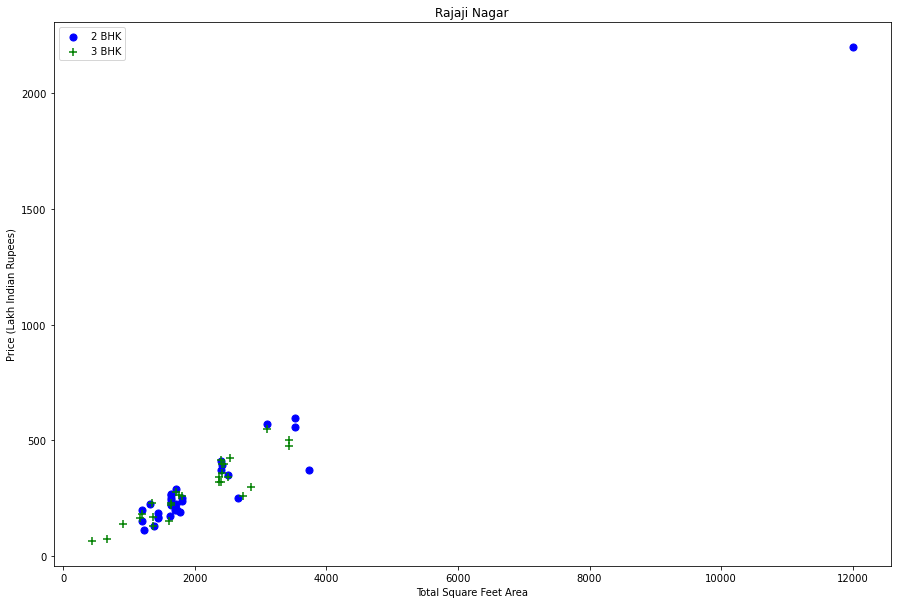

In [94]:
from matplotlib import pyplot as plt
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)


def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft_float,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft_float,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

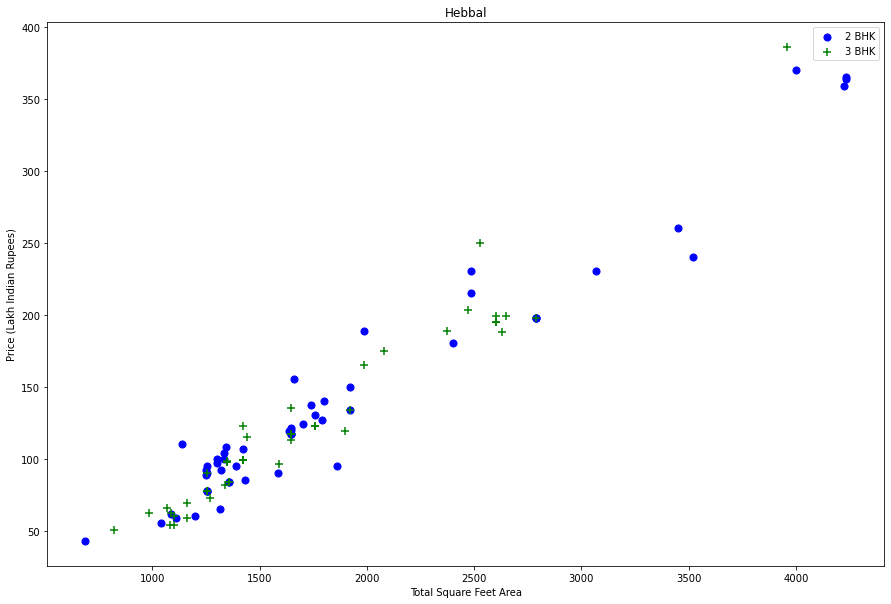

In [95]:
plot_scatter_chart(df6,"Hebbal")


In [59]:
def remove_bhk_outlier(df0):
    exclude_indices = np.array([])
    for location,location_df in df0.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
#         print(location,bhk_stats)
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df0.drop(exclude_indices,axis='index')

df7 = remove_bhk_outlier(df6)   
df7.describe()


,bath,balcony,price,total_sqft_float,price_per_sqft,bhk
count,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000,6658.000000
mean,2.599579,1.579904,102.425143,1503.504034,6446.884299,2.603935
std,1.096547,0.812623,91.842211,761.973844,2630.805063,1.257011
min,1.000000,0.000000,10.000000,302.000000,2090.909091,1.000000
25%,2.000000,1.000000,55.000000,1107.000000,4750.053833,2.000000
50%,2.000000,2.000000,77.000000,1300.000000,5877.212430,2.000000
75%,3.000000,2.000000,120.000000,1700.000000,7273.706897,3.000000
max,15.000000,3.000000,2200.000000,12000.000000,24000.000000,27.000000


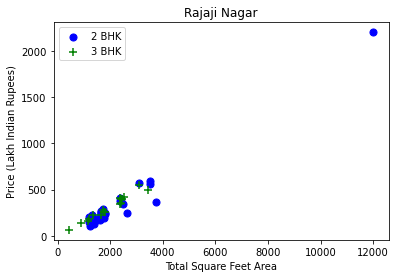

In [60]:
plot_scatter_chart(df7,"Rajaji Nagar")

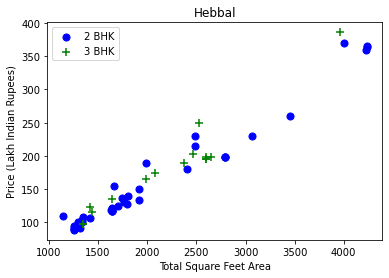

In [61]:
plot_scatter_chart(df7,"Hebbal")

In [62]:
df7

,location,bath,balcony,price,total_sqft_float,price_per_sqft,bhk
0,Devarachikkanahalli,2.0,3.0,44.0,1250.0,3520.000000,5.0
1,Devarachikkanahalli,2.0,2.0,40.0,1250.0,3200.000000,3.0
2,Devarachikkanahalli,2.0,2.0,83.0,1200.0,6916.666667,2.0
3,Devarachikkanahalli,2.0,2.0,40.0,1170.0,3418.803419,2.0
4,Devarachikkanahalli,2.0,2.0,65.0,1425.0,4561.403509,8.0
...,...,...,...,...,...,...,...
10427,other,1.0,1.0,130.0,1650.0,7878.787879,2.0
10431,other,9.0,1.0,75.0,1178.0,6366.723260,2.0
10435,other,1.0,1.0,200.0,1800.0,11111.111111,3.0
10436,other,2.0,1.0,57.0,1095.0,5205.479452,8.0


In [63]:
df7.drop('price_per_sqft',axis=1,inplace=True)
df7.drop('balcony',axis=1,inplace=True)


In [64]:
df7 = df7[df7['bhk']<6]
df7 = df7[df7['bath']<6]


In [65]:
df7.reset_index(inplace=True,drop=True)

In [66]:
df7.head()

,location,bath,price,total_sqft_float,bhk
0,Devarachikkanahalli,2.0,44.0,1250.0,5.0
1,Devarachikkanahalli,2.0,40.0,1250.0,3.0
2,Devarachikkanahalli,2.0,83.0,1200.0,2.0
3,Devarachikkanahalli,2.0,40.0,1170.0,2.0
4,Devarachikkanahalli,2.0,43.0,947.0,3.0


In [67]:
df7.describe()


,bath,price,total_sqft_float,bhk
count,6238.000000,6238.000000,6238.000000,6238.000000
mean,2.494069,98.967072,1472.671704,2.426419
std,0.854426,77.517514,677.959992,0.843894
min,1.000000,10.000000,302.000000,1.000000
25%,2.000000,55.000000,1101.000000,2.000000
50%,2.000000,75.995000,1300.000000,2.000000
75%,3.000000,115.000000,1689.210000,3.000000
max,5.000000,1250.000000,11890.000000,5.000000


In [68]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6238 entries, 0 to 6237
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   location          6238 non-null   object 
 1   bath              6238 non-null   float64
 2   price             6238 non-null   float64
 3   total_sqft_float  6238 non-null   float64
 4   bhk               6238 non-null   float64
dtypes: float64(4), object(1)
memory usage: 243.8+ KB


In [69]:
df7.to_csv('Cleaned_data3.csv')

In [70]:
df7.head(55)

,location,bath,price,total_sqft_float,bhk
0,Devarachikkanahalli,2.0,44.00,1250.0,5.0
1,Devarachikkanahalli,2.0,40.00,1250.0,3.0
2,Devarachikkanahalli,2.0,83.00,1200.0,2.0
3,Devarachikkanahalli,2.0,40.00,1170.0,2.0
4,Devarachikkanahalli,2.0,43.00,947.0,3.0
5,Devarachikkanahalli,2.0,36.00,1130.0,1.0
6,Devarachikkanahalli,2.0,76.00,1417.0,4.0
7,Devarachikkanahalli,2.0,58.00,1230.0,3.0
8,Devarachikkanahalli,3.0,75.00,1705.0,2.0
9,Devarachikkanahalli,2.0,47.00,1116.0,3.0


In [71]:
X = df7.drop(columns=['price'])
Y = df7['price']

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler # StandardScaler(mean=0,std=1) or normalization used to scale down the feature such that in lr model we get our gradient descent fastly.
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [73]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)


In [74]:
print(X_train.shape)
print(X_test.shape)

(4990, 4)
(1248, 4)


In [75]:
print(X_train.head()) # just to check in which order our columns are arranged so that when we pass the data from used we should pass in same sequence.
print(Y_train.head())

                         location  bath  total_sqft_float  bhk
1192                 Channasandra   3.0            1200.0  2.0
5677                        other   4.0            1810.0  3.0
1029  Bommasandra Industrial Area   2.0            1220.0  2.0
2891               Kanakpura Road   3.0            1260.0  2.0
2797                 Kammanahalli   4.0             782.0  2.0
1192     67.77
5677    148.00
1029     35.20
2891     63.58
2797     85.00
Name: price, dtype: float64


In [76]:
column_trans = make_column_transformer( (OneHotEncoder(sparse=False), ['location']), remainder = 'passthrough')
# one hot encoding will be applied to only loation column and passthrough reflects that all other columns which are not specified will be remain as it is.
#sparse=False actually prevents it from returning sparse matrix.

In [77]:
# ohe = OneHotEncoder(sparse=True)  # sparse=False returns an array , sparse=True returns tuples of (row,feature) value set to 1.
# print(ohe.fit_transform(df8[['location']]))
# ohe.categories_       # tells the categories which are encoded.

In [78]:
scaler = StandardScaler()   # standard scalar will feature the data with mean=0 and std=1.


In [79]:
lr = LinearRegression()

In [80]:
pipe = make_pipeline(column_trans,scaler,lr) # it executes column_trans first then scaler then lr.

In [81]:
pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [82]:
Y_pred_lr = pipe.predict(X_test)

In [83]:
r2_score(Y_test,Y_pred_lr)

0.8611461200422836

# Lasso

In [84]:
lasso = Lasso()
pipe1 = make_pipeline(column_trans,scaler, lasso)
pipe1.fit(X_train,Y_train)
Y_pred_lasso = pipe1.predict(X_test)
r2_score(Y_test,Y_pred_lasso)

0.8433987009214962

# Ridge

In [85]:
ridge = Ridge()
pipe2 = make_pipeline(column_trans,scaler, ridge)
pipe2.fit(X_train,Y_train)
Y_pred_ridge = pipe2.predict(X_test)
r2_score(Y_test, Y_pred_ridge)

0.861155314873183

# DecisionTreeRegressor

In [86]:
from sklearn import tree
dreg = tree.DecisionTreeRegressor()
pipe3 = make_pipeline(column_trans,scaler,dreg)
pipe3.fit(X_train,Y_train)
Y_pred_dct = pipe3.predict(X_test)
r2_score(Y_test, Y_pred_dct)

0.7926086007086468

# Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()
pipe4 = make_pipeline(column_trans, scaler, rfreg)
pipe4.fit(X_train,Y_train)
Y_pred_rfr = pipe4.predict(X_test)
r2_score(Y_test,Y_pred_rfr)

0.8569975279417077


# pickling the LR model.

In [88]:
import pickle

In [89]:
lr_file_model = open("lr_model.pkl","wb")
pickle.dump(pipe,lr_file_model)

In [90]:
lasso_file_model1 = open("lasso_model1.pkl","wb")
pickle.dump(pipe1,lasso_file_model1)

In [91]:
ridge_file_model = open("ridge_model1.pkl","wb")
pickle.dump(pipe2,ridge_file_model)

In [92]:
rfr_file_model = open("rfr_model1.pkl","wb")
pickle.dump(pipe4,rfr_file_model)